In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import lfilter, butter
from itertools import product

In [2]:
import reconstructionutils as ru
import cutility as cu

In [3]:
import seaborn as sns
sns.set_theme()

In [4]:
# import multichannel ecg data by R.Moss
data = pd.read_csv('./ECG_data/moss/MeasuredECG.txt', sep=" ", header=1)
data.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

In [590]:
grade = 2

In [591]:
b, a = butter(N=3*1, Wn=5., fs=996)

#z_1_filtered = lfilter(b, a, z_1_periodical)

series = [lfilter(b, a, data['W1']),
          lfilter(b, a, data['W3']),
          lfilter(b, a, data['W4']),
          lfilter(b, a, data['E1'])
         ]

In [592]:
dt = (1/996)
series_derivate = [np.gradient(el, ) for el in series]

In [593]:
system = ru.Model(series, grade=grade, derivate=series_derivate)

In [594]:
res = system.evaluate()

no initial values defined.


/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


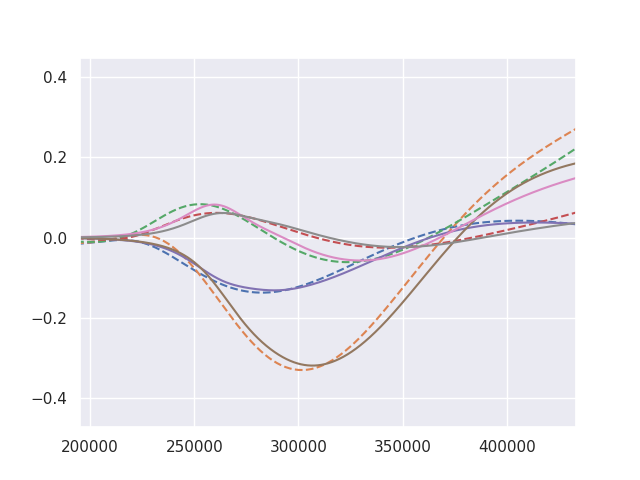

In [596]:
%matplotlib notebook
for el in series:
    plt.plot(data['time'] * 1024, el, linestyle='--')
plt.plot(res)
plt.ylim([-2, 2])
plt.show()

In [583]:
grade = 6

In [584]:
b, a = butter(N=3*0, Wn=5., fs=996)

#z_1_filtered = lfilter(b, a, z_1_periodical)

series = [lfilter(b, a, data['E1']),
          data['time']
         ]

In [585]:
dt = (1/996)
series_derivate = [np.gradient(el, ) for el in series]

In [586]:
system = ru.Model(series, grade=grade, derivate=series_derivate)

In [587]:
res = system.evaluate(ivp=[series[0][10], series[1][10]])

/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


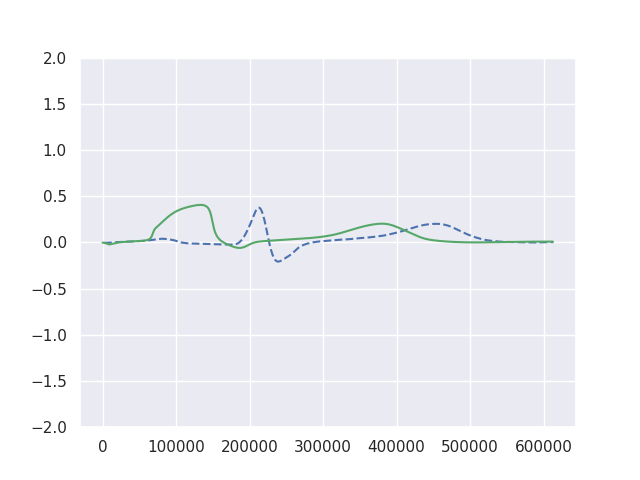

In [588]:
%matplotlib notebook
for el in series:
    plt.plot(data['time'] * 1024, el, linestyle='--')
plt.plot(res)
plt.ylim([-2, 2])
plt.show()